<a href="https://colab.research.google.com/github/GregoryL12/Stroke-Prediction/blob/main/Stroke_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##For this Task:
Whether you chose 2 pre-approved datasets or 2 datasets from another source, or one of each:

Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

First choice: dataset 1
1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Second choice: dataset 2
1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Stroke Prediction Dataset

Source of data: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

 Brief description of data: According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [ ]:
sr_df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
sr_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The target column is Stroke.

The column gender describes the gender of the patient and whether they are male or female.

This is a Classification problem.

This data has 11 features.

In [ ]:
sr_df.shape

(5110, 12)

This data has 5110 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? I would drop the column id since it has no effect on the data and might mislead some predictions. Other than that there are no missing values so I should not have any challenges.

#Adult income dataset

Source of data: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Brief description of data: An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

In [ ]:
ai_df = pd.read_csv('/content/adult.csv')
ai_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The target column is Income.

The column gender describes the gender of the adult and  whether they are male or female.

This is a Classification problem.

This data has 14 features.

In [ ]:
ai_df.shape

(48842, 15)

This data has 48842 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? This data does not have any missing data and I can not forsee any other challenges.

#Cleaning and exploring the data

##Stroke Prediction Dataset

In [ ]:
sr_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
sr_df.drop(columns='id', inplace=True)
sr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print(f'There are {sr_df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [ ]:
print(f'There are {sr_df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [ ]:
sr_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

All the missing values are within the bmi column

In [ ]:
bmi_median = sr_df['bmi'].median()
sr_df['bmi'].fillna(bmi_median, inplace=True)
sr_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

I have replaced all missing values in bmi column with the median value of the column.

In [ ]:
sr_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
dtypes = sr_df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f"- Column= {col}")
    print(sr_df[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



- Column= smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





In [ ]:
sr_df['smoking_status'] = sr_df['smoking_status'].replace('Unknown', 'unknown')
sr_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

All the object type features have the correct amount of unique values.

In [ ]:
sr_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


I am not a subject matter expert but 97.6 BMI seems unreasonable but is possible so I will not adjust it.

This a countplot showing the number of patients who have had a stroke to who have not had one.

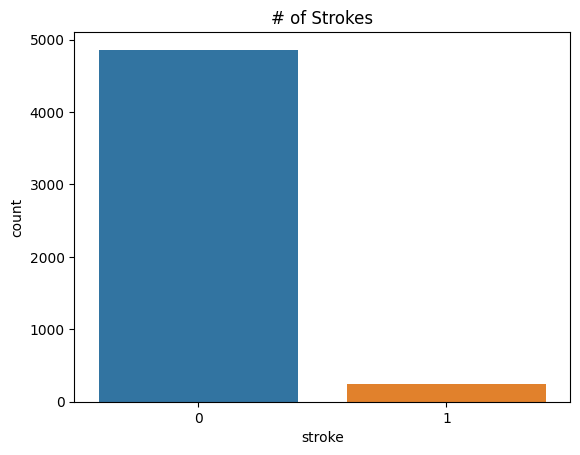

In [ ]:
ax = sns.countplot(x=sr_df['stroke'])
ax.set_title('# of Strokes');

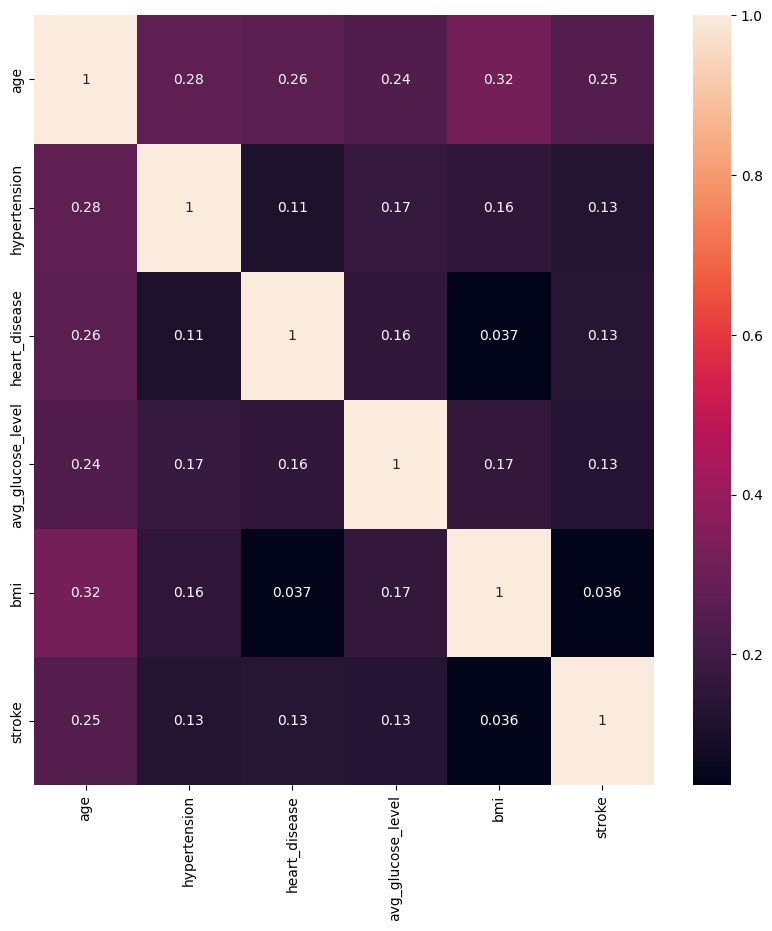

In [ ]:
corr = sr_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True);

This is a heat map to show the corrrelation between the target and the variables.

Age has the highest correlation to stroke meaning. Hypertension, heart_disease, and	avg_glucose_level all have the same correlation with stroke and bmi has the least so we can assume it has the least amount of weight to put into if the person has had or will have a stroke.

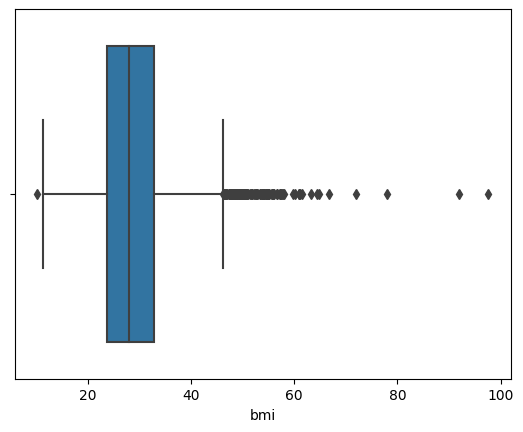

In [ ]:
sns.boxplot(x=sr_df['bmi']);

This boxplot is visualizing the outliers in the bmi column.

### I am choosing stroke dataset as the set for this project.

Stroke has correlation with every variable except for BMI. It especially has high correlation with Age.

Age has high correlation with every variable.

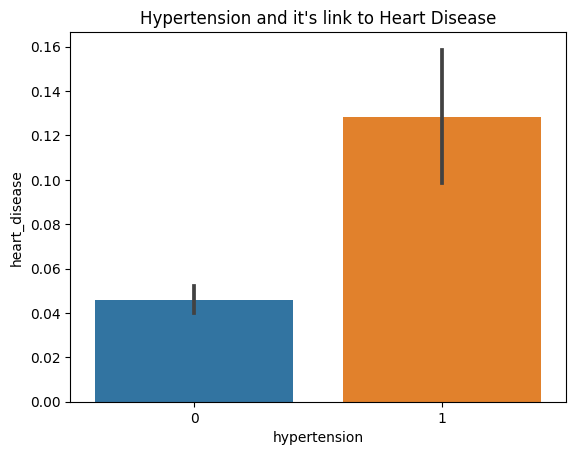

In [ ]:
ax = sns.barplot(data=sr_df, x='hypertension', y='heart_disease')
ax.set_title("Hypertension and it's link to Heart Disease");

This graph shows people with hypertension have higher risks of heart disease.

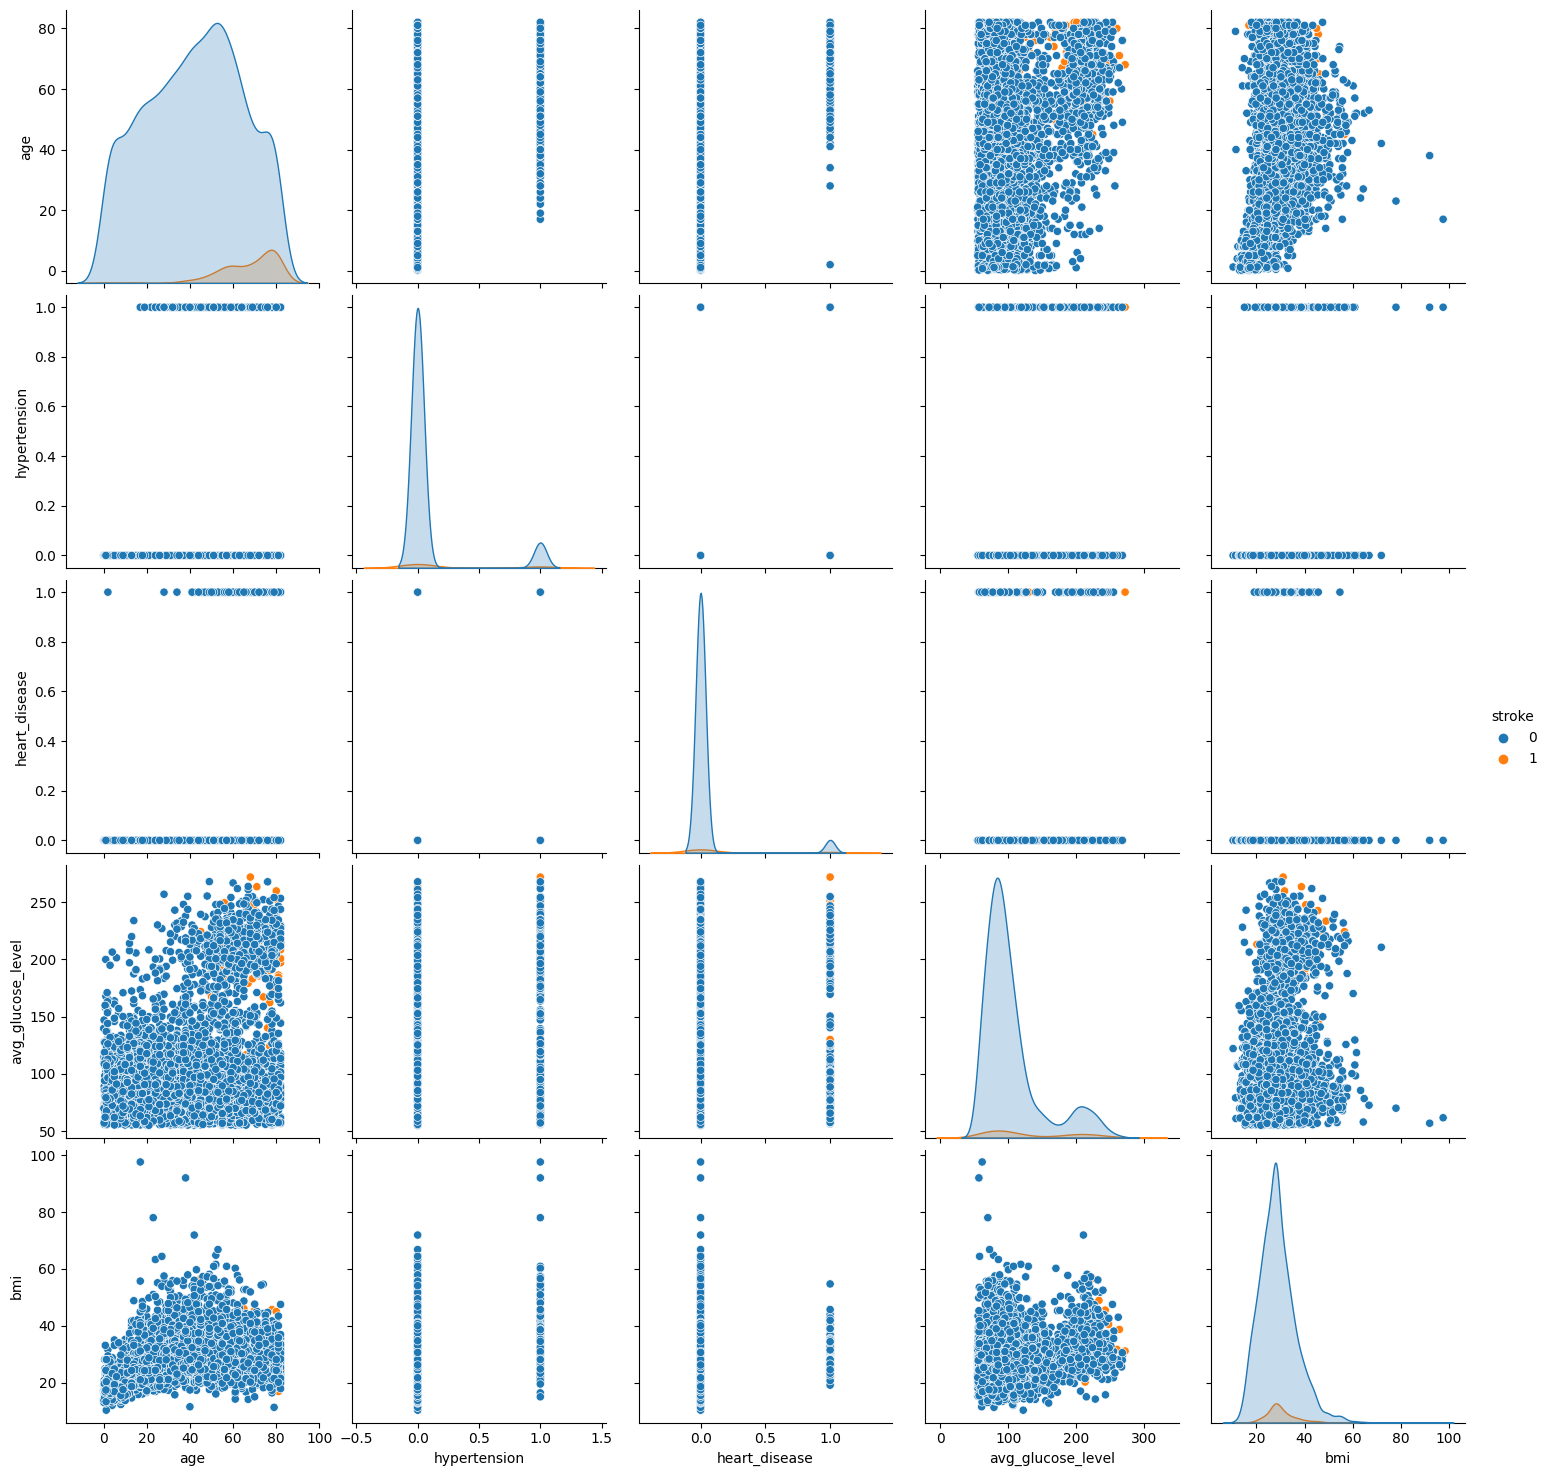

In [ ]:
sns.pairplot(sr_df, hue='stroke', size=3)
plt.show()

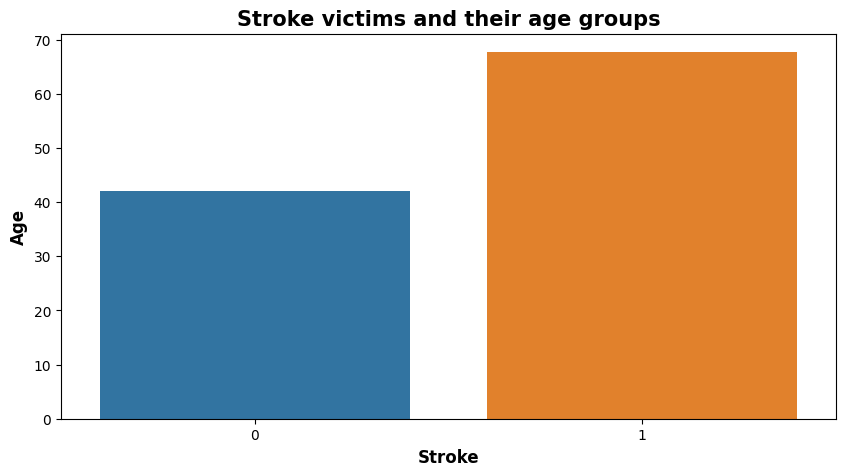

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(data=sr_df,y='age', x = 'stroke', ci = None)
ax.set_title('Stroke victims and their age groups', fontsize = 15, fontweight = 'bold');
ax.set_xlabel('Stroke', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Age', fontsize = 12, fontweight = 'bold');

This graph shows stroke victims sorted by their age. We can conclude from the graph that the older the person the more likely they are to have a stroke.

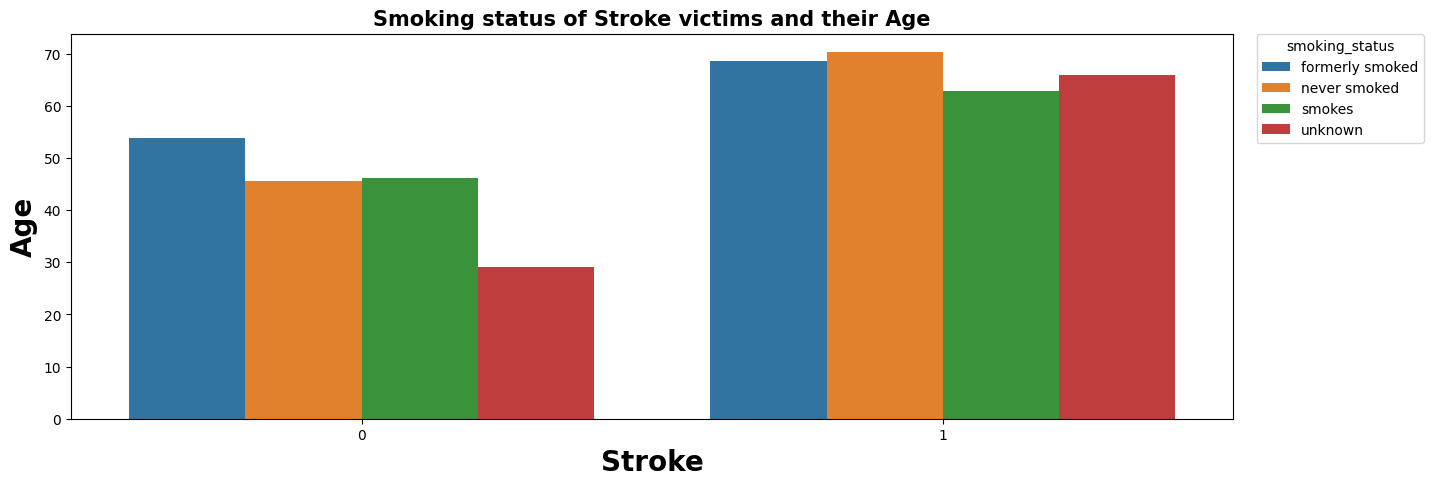

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.barplot(data=sr_df, x='stroke', y='age', hue='smoking_status', ci = None)
ax.set_title('Smoking status of Stroke victims and their Age', fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper left', title='smoking_status', bbox_to_anchor=(1.02, 1), borderaxespad=0)
ax.set_xlabel('Stroke', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Age', fontsize = 20, fontweight = 'bold');

This graph shows the correlation between if a person has smoked and whether they have had a stroke. The y axis also shows the ages of each smoking status group. It shows that on average stroke victims tend to be older regardless if they smoke or not.

##Modeling

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Classification Metrics

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

###Train Test Split

In [ ]:
X = sr_df.drop('stroke', axis=1)
y = sr_df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
y_train.value_counts(normalize=True)

0    0.955898
1    0.044102
Name: stroke, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.937402
1    0.062598
Name: stroke, dtype: float64

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4505,Female,60.00,1,0,Yes,Private,Urban,234.50,43.7,never smoked
3576,Male,41.00,0,0,Yes,Private,Rural,83.97,28.5,formerly smoked
3032,Male,52.00,0,0,Yes,Private,Urban,87.51,30.5,formerly smoked
1867,Female,55.00,0,0,Yes,Private,Rural,63.47,27.8,unknown
494,Female,55.00,0,0,Yes,Private,Rural,111.19,39.7,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
4426,Male,43.00,0,0,Yes,Govt_job,Rural,88.00,30.6,never smoked
466,Female,61.00,1,0,Yes,Private,Rural,170.05,60.2,smokes
3092,Female,1.16,0,0,No,children,Urban,97.28,17.8,unknown
3772,Male,80.00,0,0,Yes,Self-employed,Rural,196.08,31.0,formerly smoked


Categorical Features:Residence_type , work_type, gender, smoking_status

Numeric Features:age , avg_glucose_level, bmi

Nominal Features:ever_married, hypertension, heart_disease, smoking_status

###Preprocessor

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
freq_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
num_pipeline = make_pipeline(mean_imputer, scaler)
num_selector = make_column_selector(dtype_include= 'number')
numeric_tuple = (num_pipeline, num_selector)

In [ ]:
num_selector(X_train)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [ ]:
cat_selector = make_column_selector(dtype_include='object')

categorical_pipeline = make_pipeline(freq_imputer, ohe)

category_tuple = (categorical_pipeline, cat_selector)

In [ ]:
preprocessor = make_column_transformer(numeric_tuple,
                                       category_tuple,
                                       remainder='drop')

In [ ]:
# I am using custom function from code along to evaluate the classification metrics

## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

##KNN Model

In [ ]:
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(preprocessor, knn)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468ac0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [ ]:
## print the classification reports
labels = ['0','1']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.70      0.04      0.08       169

    accuracy                           0.96      3832
   macro avg       0.83      0.52      0.53      3832
weighted avg       0.95      0.96      0.94      3832

Test Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



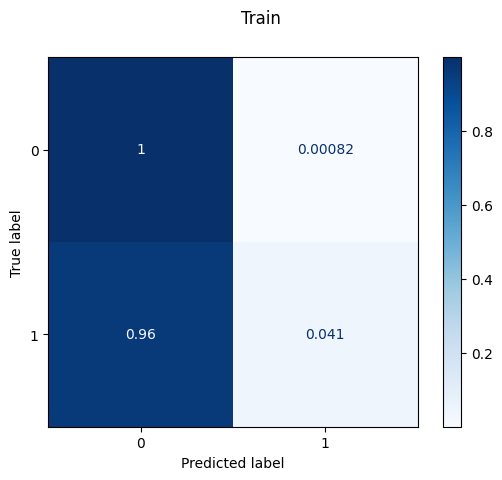

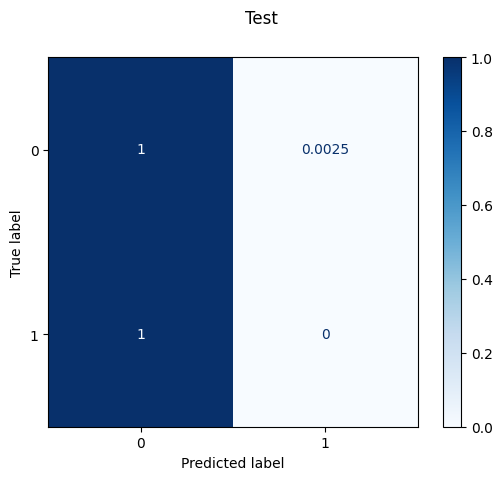

In [ ]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Blues')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Blues')
plt.suptitle('Test');

In [ ]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                              

In [ ]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(5),
          'kneighborsclassifier__weights': ['uniform'],
          'kneighborsclassifier__leaf_size': [30]}

In [ ]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468ac0>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [30],
                         'kneighborsclassifier__n_neighbors': range(0, 5),
                         'kneighborsclassifier__weights': ['uniform']})

In [ ]:
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__n_neighbors': 4,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
knn_gs.best_score_

0.9553763093126726

In [ ]:
best_knn = knn_gs.best_estimator_

In [ ]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [ ]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.83      0.03      0.06       169

    accuracy                           0.96      3832
   macro avg       0.90      0.51      0.52      3832
weighted avg       0.95      0.96      0.94      3832

Test
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



Text(0.5, 1.0, 'Test CM')

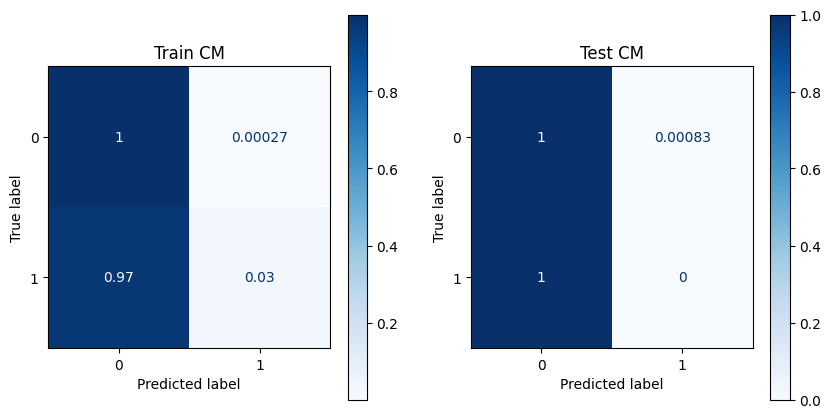

In [ ]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Blues',normalize='true')

axes[1].set_title('Test CM')

##Logistic Regression

In [ ]:
lr = LogisticRegression(random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468ac0>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
## Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)
## Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
## print the classification reports
labels = ['0','1']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.96      0.93      3832

Test Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3663
           1       0.21      0.18      0.19       169

    accuracy                           0.93      3832
   macro avg       0.58      0.57      0.58      3832
weighted avg       0.93      0.93      0.93      3832



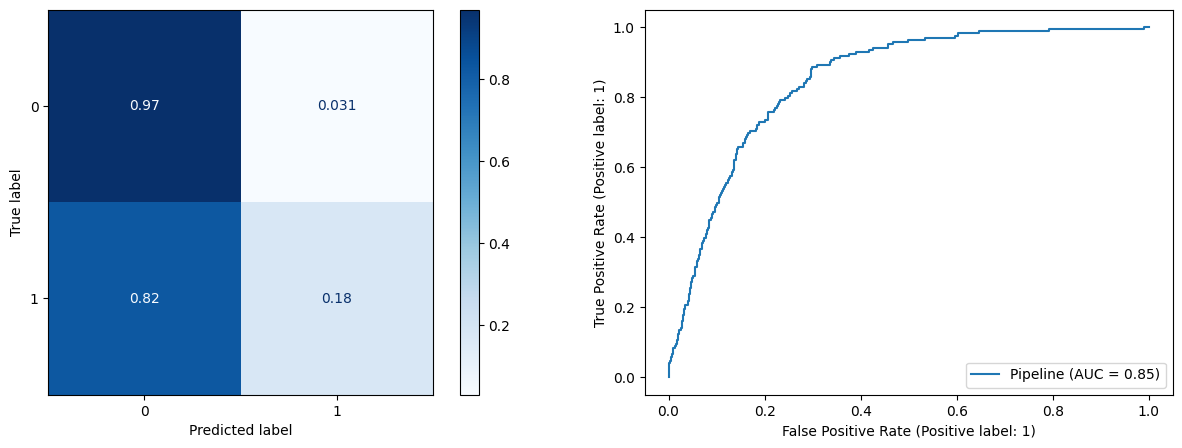

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1198
           1       0.35      0.23      0.27        80

    accuracy                           0.92      1278
   macro avg       0.65      0.60      0.62      1278
weighted avg       0.91      0.92      0.92      1278



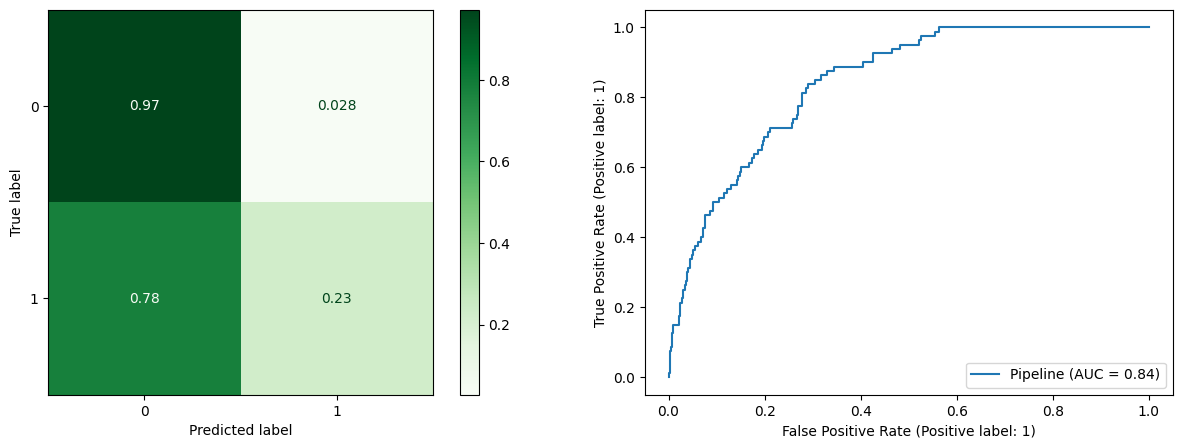

In [ ]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(lr_pipe, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

In [ ]:
# Display the hyperparameters.
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                              

In [ ]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'logisticregression__random_state': [42]}

In [ ]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468ac0>)])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__random_state': [42]})

In [ ]:
lr_gs.best_params_

{'logisticregression__C': 0.001, 'logisticregression__random_state': 42}

In [ ]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.96      0.93      3832



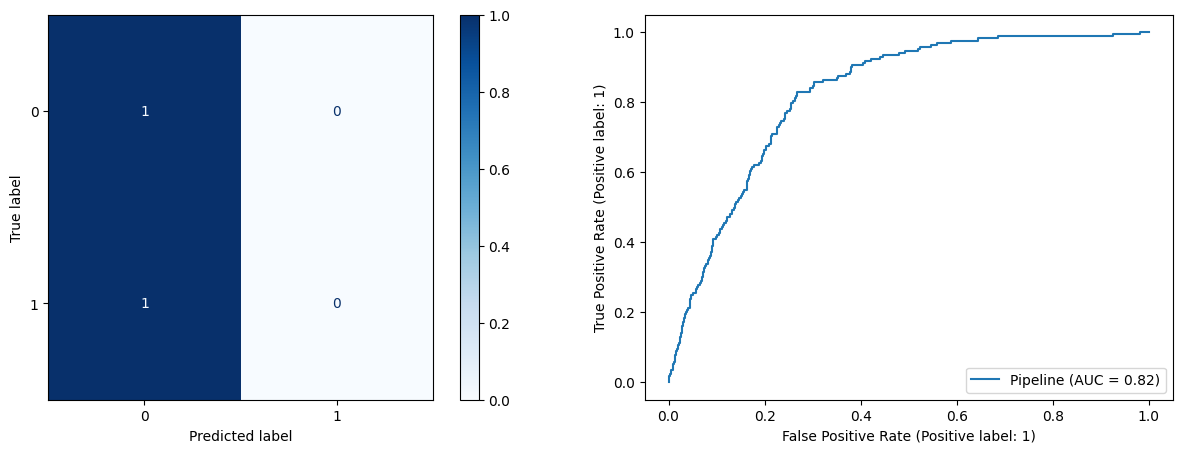

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



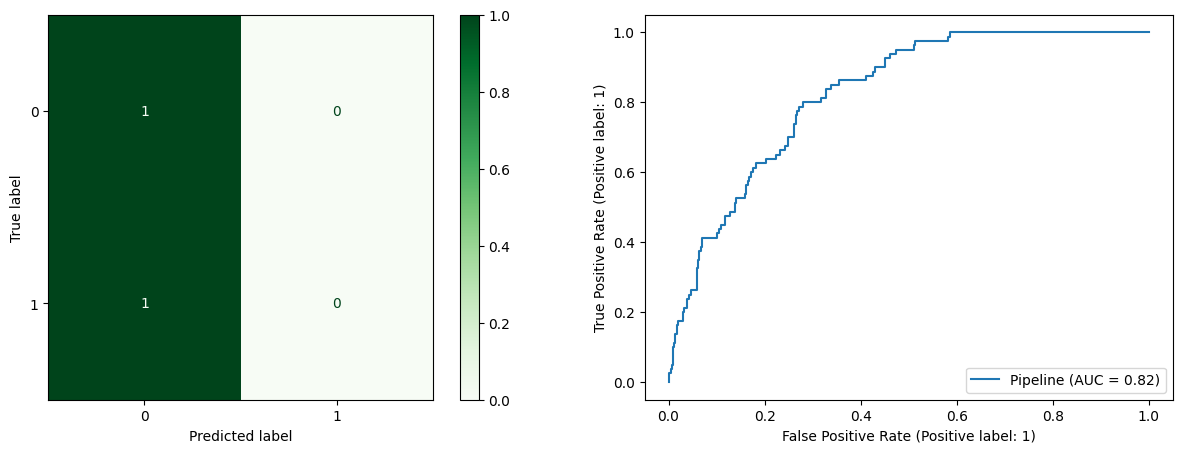

In [ ]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

##Feature Engineering

###PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca95 = PCA(n_components=.95)

In [ ]:
transformer = make_pipeline(preprocessor, PCA(n_components=.95))

###KNN PCA

In [ ]:
pca_knn_pipe = make_pipeline(transformer, knn)
pca_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468ac0>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
print('Training accuracy:', pca_knn_pipe.score(X_train, y_train))
print('Testing accuracy:', pca_knn_pipe.score(X_test, y_test))

Training accuracy: 0.9574634655532359
Testing accuracy: 0.935054773082942


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3663
           1       0.43      0.31      0.36       169

    accuracy                           0.95      3832
   macro avg       0.70      0.65      0.67      3832
weighted avg       0.94      0.95      0.95      3832



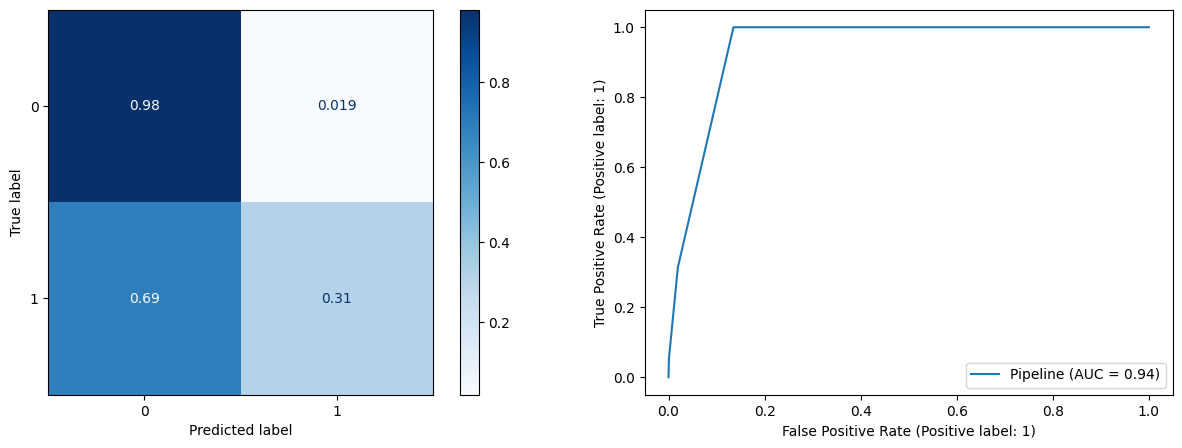

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1198
           1       0.16      0.06      0.09        80

    accuracy                           0.92      1278
   macro avg       0.55      0.52      0.52      1278
weighted avg       0.89      0.92      0.90      1278



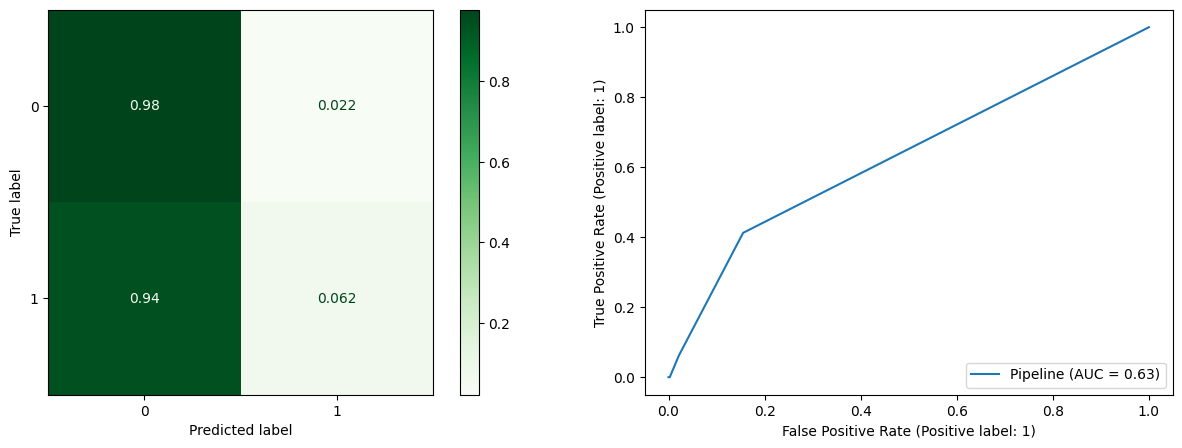

In [ ]:
classification_metrics(pca_knn_pipe, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(pca_knn_pipe, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

###Logistic Regression PCA

In [ ]:
pca_lr_pipe = make_pipeline(transformer, lr)
pca_lr_pipe.fit(X_train, y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468610>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x791ebd468ac0>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
print('Training accuracy:', pca_lr_pipe.score(X_train, y_train))
print('Testing accuracy:', pca_lr_pipe.score(X_test, y_test))


Training accuracy: 0.9558977035490606
Testing accuracy: 0.9374021909233177


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3663
           1       0.19      0.16      0.18       169

    accuracy                           0.93      3832
   macro avg       0.58      0.56      0.57      3832
weighted avg       0.93      0.93      0.93      3832



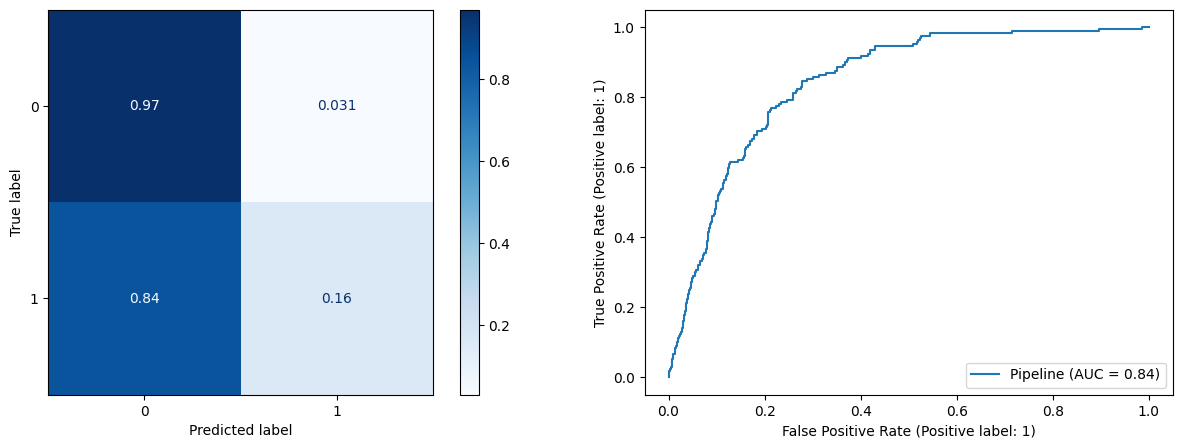

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1198
           1       0.40      0.20      0.27        80

    accuracy                           0.93      1278
   macro avg       0.67      0.59      0.62      1278
weighted avg       0.91      0.93      0.92      1278



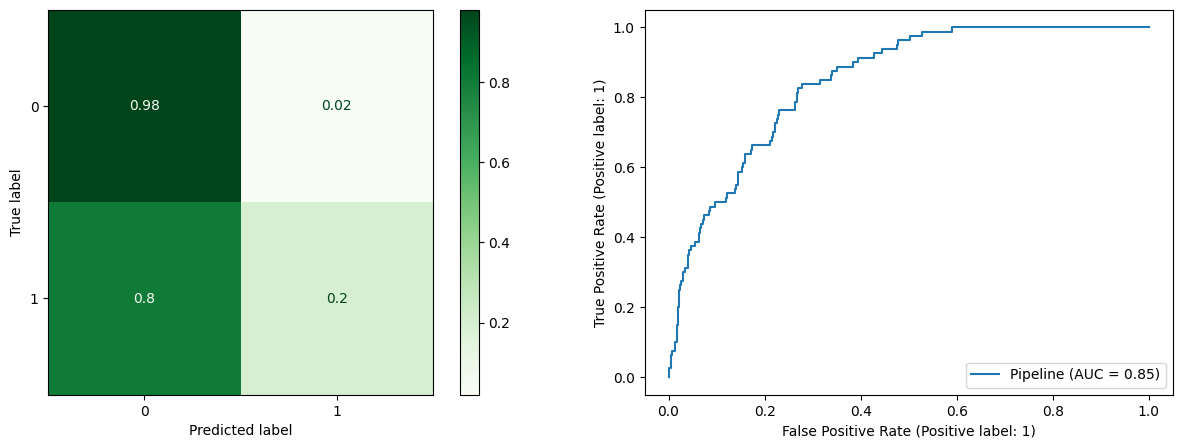

In [ ]:
classification_metrics(pca_lr_pipe, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(pca_lr_pipe, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

In [ ]:
sr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
sr_df['age'] = sr_df['age'].round(-1)
sr_df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,70.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,60.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,50.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,80.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
sr_df['genderage'] = sr_df['gender'] + sr_df['age'].astype('string')
sr_df.drop(columns=['gender','age'], inplace=True)
sr_df.head()

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,genderage
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Male70.0
1,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Female60.0
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Male80.0
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Female50.0
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Female80.0


My chosen Production model and best performing model is the logistic regression model that has not been hypertuned.